#### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import statsmodels.api as sm

/Users/evanchu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### All questions in Parts I and II apply to a random sample of 15 stocks that your group will be assigned by running the following code.

#### Random Sample Selection 

In [3]:
np.random.seed (2051 + 15)
ticker_list = ['AAPL', 'AXP', 'BA', 'C','CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WMT', 'XOM']

stock_list = np.random.choice(ticker_list,15,replace=False)
print(f'These are the fifteen stocks assigned to you: {" ".join(stock_list)}')

These are the fifteen stocks assigned to you: AAPL JNJ VZ JPM C WMT PFE KO DIS UNH XOM HD BA NKE AXP


### PART I

#### 1. Find the optimal portfolio over the period January 2015 - December 2019, using the fifteen stocks assigned to your group. Assume there are no short-selling constraints.

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize


# Collect historical price data for each stock in stock_list
prices = pd.DataFrame()
for stock in stock_list:
    ticker = yf.Ticker(stock)
    data = ticker.history(start='2015-01-01', end='2019-12-31', auto_adjust=True)
    prices[stock] = data['Close']

# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate expected daily return and daily standard deviation
# for each stock
mu = returns.mean()
sigma = returns.std()

# Create covariance matrix
cov = returns.cov()

# Define objective function for optimization problem
def obj_fun(w, cov, mu, target_return):
    portfolio_return = w.dot(mu)
    portfolio_sigma = np.sqrt(w.dot(cov).dot(w))
    penalty = 100 * abs(portfolio_return - target_return)
    return portfolio_sigma + penalty

# Set optimization parameters
num_stocks = len(stock_list)
w0 = np.ones(num_stocks) / num_stocks
bounds = [(0, 1)] * num_stocks
constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1})

# Set target return and find optimal portfolio
target_return = 0.1
res = minimize(obj_fun, w0, args=(cov, mu, target_return), bounds=bounds,
               constraints=constraints)

# Print optimal portfolio weights
optimal_weights = res.x
for i in range(num_stocks):
    print(stock_list[i], optimal_weights[i])


AAPL 0.190365946247462
JNJ 3.848917712323541e-17
VZ 1.315137235224917e-16
JPM 0.0
C 7.762887554996212e-17
WMT 5.312590645178972e-18
PFE 4.85722573273506e-17
KO 0.0
DIS 1.8431436932253575e-17
UNH 0.6968856922862973
XOM 2.381992172950653e-16
HD 9.84455572616838e-17
BA 0.11274836146624063
NKE 0.0
AXP 5.312590645178972e-18


#### 2. What are the weights of the stocks in the optimal portfolio?

In [5]:
print("Optimal portfolio weights:")
for i in range(num_stocks):
    print(stock_list[i], optimal_weights[i])

Optimal portfolio weights:
AAPL 0.190365946247462
JNJ 3.848917712323541e-17
VZ 1.315137235224917e-16
JPM 0.0
C 7.762887554996212e-17
WMT 5.312590645178972e-18
PFE 4.85722573273506e-17
KO 0.0
DIS 1.8431436932253575e-17
UNH 0.6968856922862973
XOM 2.381992172950653e-16
HD 9.84455572616838e-17
BA 0.11274836146624063
NKE 0.0
AXP 5.312590645178972e-18


#### 3. What was the annualized average monthly return for the optimal portfolio?

In [6]:
# Calculate monthly returns for the optimal portfolio
monthly_returns = returns.dot(optimal_weights)

# Calculate annualized average monthly return for the optimal portfolio
annualized_return = (1 + monthly_returns.mean()) ** 12 - 1

print("Annualized average monthly return for the optimal portfolio: {:.2%}".format(annualized_return))


Annualized average monthly return for the optimal portfolio: 1.20%


#### 4. What was the annualized monthly standard deviation for the optimal portfolio?

In [7]:
# Calculate annualized monthly standard deviation for the optimal portfolio
annualized_std = monthly_returns.std() * np.sqrt(12)

print("Annualized monthly standard deviation for the optimal portfolio: {:.2}".format(annualized_std))

Annualized monthly standard deviation for the optimal portfolio: 0.041


#### 5. What was the Sharpe Ratio of the optimal portfolio?

In [8]:
# Calculate Sharpe Ratio for the optimal portfolio (assuming a risk-free rate of 0)
sharpe_ratio = annualized_return / annualized_std

print("Sharpe Ratio of the optimal portfolio: {:.2f}".format(sharpe_ratio))

Sharpe Ratio of the optimal portfolio: 0.29


### PART II

#### 1. Create a DataFrame named optimal_weights to store the weights from a portfolio optimization performed on a rolling basis. Specifically, the optimization should use a 60 month rolling window, and be performed every month. The first 60 months correspond to the sample period for data_initial (01/2015 - 12/2019) created in question 3. Hence, the first observation in the optimal_weights DataFrame should be the weights you listed above in Part I. The next 60 month period should be 02/2015 - 01/2020, followed by 03/2015 - 02/2020, and so on. The last 60 month period should be 03/2018 - 02/2023. Again, assume there are no short-selling constraints.

In [9]:
import datetime as dt

start_part_2 = dt.datetime(2015, 1, 1)
end_part_2 =  dt.datetime(2023, 2, 1)
returns = yf.download(stock_list.tolist(), start_part_2-pd.offsets.BDay(1), end_part_2+pd.offsets.BDay(1))['Adj Close'].pct_change().dropna()
returns_actual_mon = yf.download(stock_list.tolist(), start_part_2-pd.offsets.BDay(1), end_part_2+pd.offsets.BDay(1))['Adj Close'].resample("M").last().dropna()

returns.tail()

   


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed


,AAPL,AXP,BA,C,DIS,HD,JNJ,JPM,KO,NKE,PFE,UNH,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,
2023-01-26,0.014803,-0.005677,0.000235,0.005588,0.014613,-0.010874,-0.003658,0.006182,-0.001969,0.005598,-0.009180,-0.000041,-0.001488,-0.000913,0.040191
2023-01-27,0.013684,0.105402,-0.007333,-0.006323,-0.001458,0.009177,-0.003908,0.002429,-0.005262,0.000000,-0.010395,-0.013056,0.009188,0.007665,-0.018257
2023-01-30,-0.020078,0.002031,-0.007103,-0.002121,-0.017802,-0.007736,-0.037033,-0.008481,0.002480,-0.009096,-0.005481,-0.000535,0.010089,-0.008025,-0.017732
2023-01-31,0.009021,0.013147,0.015882,0.009082,0.008365,0.031600,0.008765,0.005966,0.011214,0.007597,0.014007,0.027584,0.012668,0.012100,0.021575
2023-02-01,0.007901,-0.007546,0.008216,-0.001340,0.008296,0.012092,0.009179,-0.002644,0.000163,0.017042,-0.004303,-0.004387,0.002887,0.005561,-0.010947


In [10]:
import pandas_datareader.data as web

returns_mon = returns.resample(rule = 'M').apply(lambda x: x.add(1).prod().sub(1))
returns_mon
len(returns_mon.index)
returns.index = pd.to_datetime(returns.index)
returns_mon.head()
rf = web.DataReader('F-F_Research_Data_Factors_daily','famafrench', start_part_2, end_part_2)[0][['RF']].div(100)
rf.tail()

,RF
Date,
2023-01-26,0.00017
2023-01-27,0.00017
2023-01-30,0.00017
2023-01-31,0.00017
2023-02-01,0.00018


In [24]:
optimal_weights = pd.DataFrame()

for i in range(0,len(returns_mon.index)-60+1):
    def portfolio_returns(weights):
        portfolio_returns = np.dot(returns.iloc[i:i+60]*12, weights).mean()
        return portfolio_returns
    # Define the excess portfolio returns function
    def ex_port_ret(weights):
        ex_port_ret = (np.dot(returns_mon.iloc[i:i+60],weights) - rf.iloc[i:i+60]['RF']).mean()*12
        return ex_port_ret

    # Define the excess portfolio standard deviation function
    def ex_port_std(weights):
        ex_port_std = (np.dot(returns_mon.iloc[i:i+60],weights) - rf.iloc[i:i+60]['RF']).std()*np.sqrt(12)
        return ex_port_std

    # Define the negative Sharpe Ratio function that we will minimize
    def neg_SR(weights):
        SR = ex_port_ret(weights) / ex_port_std(weights)
        return (-1)*SR

    # By convention of minimize function it should be a function
    # that returns zero for conditions
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

    # Weights must be between 0 and 1
    boundaries=[(0,1)]
    bounds = tuple(boundaries * len(returns_mon.columns))

    # Initial Guess (equally weighted)
    init_guess = np.full(len(returns_mon.columns),1/len(returns_mon.columns))
    
    optimal_port= minimize(neg_SR,init_guess,bounds = bounds,constraints=constraints)
    
    optimal_weights = pd.concat([optimal_weights,
                                pd.DataFrame(optimal_port.x.reshape(1,len(stock_list)).round(4),
                                             columns=[stock_list],
                                             index=[returns_mon.iloc[i:i+60].index[-1]])],
                                axis=0)

optimal_weights.tail()


,AAPL,JNJ,VZ,JPM,C,WMT,PFE,KO,DIS,UNH,XOM,HD,BA,NKE,AXP
2022-10-31,0.3810,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.5083,0.0,0.0914,0.0193
2022-11-30,0.3531,0.0,0.0,0.0,0.0,0.0470,0.0,0.0,0.0671,0.0000,0.0000,0.4141,0.0,0.0973,0.0212
2022-12-31,0.3214,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.1062,0.0384,0.0362,0.4746,0.0,0.0000,0.0232
2023-01-31,0.4309,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0713,0.0357,0.0000,0.4196,0.0,0.0000,0.0426
2023-02-28,0.2685,0.0,0.0,0.0,0.0,0.0579,0.0,0.0,0.1171,0.0000,0.0000,0.3047,0.0,0.1751,0.0767


#### 2. Create a new DataFrame named port_returns to store the monthly returns over the sample period 01/2020 - 02/2023 for the following portfolios:
 1) A monthly rebalanced portfolio using the rolling optimal weights. Specifically, the portfolio return for 01/2020 should be based on the weights as of 12/2019 (the same values detailed in Part I and in the first row in the optimal_weights DataFrame), the portfolio return for 02/2020 should be based on the weights as of 01/2020 and so on. Label the portfolio (MRoll_Reb_OP, an acronym for Monthly Rolling Rebalanced Optimal Portfolio). 
 2) A monthly rebalanced portfolio using the optimal weights as of 12/2019. Label the portfolio (M_Reb_OP, an acronym for Monthly Rebalancing Optimal Portfolio).
 3) A monthly rebalanced equally-weighted portfolio. Label the portfolio (M_Reb_EW, an acronym for Monthly Rebalancing Equally-Weighted Portfolio).
 4) A buy and hold portfolio, initially allocated according to the optimal weights as of 12/2019. Label the portfolio (BH_OP, an acronym for Buy and Hold Optimal Portfolio).
 5) A buy and hold portfolio, initially allocated equally across stocks. Label the portfolio (BH_EW, an acronym for Buy and Hold Equally-Weighted Portfolio).

In [25]:
port_returns = pd.DataFrame()

'''1'''
for i in range(0,len(optimal_weights)-1):
    port_returns = pd.concat([port_returns, 
                                pd.DataFrame({'MRoll_Reb_OP':np.dot(optimal_weights.iloc[i], returns.iloc[i+60])}, index = [returns.index[i+60]])], axis=0)

'''2'''
port_returns = pd.concat([port_returns,
                               pd.DataFrame({'M_Reb_OP':np.dot(returns.iloc[0+60:], optimal_weights.iloc[0])}, index = returns.index[0+60:])], axis=1)

'''3'''
EW = pd.DataFrame()
EW.index = stock_list
EW['EWs'] = 1/15
port_returns['M_Reb_EW'] = np.dot(returns.iloc[0+60], EW['EWs'])

'''4'''
retvalue = pd.DataFrame()
retvalue = returns.apply(lambda x:(x+1).cumprod())
port_returns['BH_OP'] = list(pd.Series(np.dot(retvalue.iloc[0+59:], optimal_weights.iloc[0])).pct_change().dropna())

'''5'''
retvalue = pd.DataFrame()
retvalue = returns.apply(lambda x:(x+1).cumprod())
port_returns['BH_EW'] = list(pd.Series(np.dot(retvalue.iloc[0+59:], EW['EWs'])).pct_change().dropna())

port_returns.head()
port_returns.tail()

,MRoll_Reb_OP,M_Reb_OP,M_Reb_EW,BH_OP,BH_EW
2023-01-26,NaN,0.001342,-0.008024,0.002220,0.003460
2023-01-27,NaN,-0.002634,-0.008024,-0.003551,0.004735
2023-01-30,NaN,-0.004244,-0.008024,-0.005480,-0.009182
2023-01-31,NaN,0.017690,-0.008024,0.019837,0.015313
2023-02-01,NaN,0.003507,-0.008024,0.002247,0.003156


#### 3. Create a DataFrame port_stats (with a 3x5 shape) to store the annualized average monthly return, the annualized monthly standard deviation and the Sharpe ratio for all 5 portfolios.

In [26]:
port_stats = pd.DataFrame(index=['Annualized Monthly Return', 'Annualized STD', 'Sharpe Ratio'], columns=port_returns.columns)
port_stats.loc['Annualized Monthly Return'] = port_returns.mean() * 12
port_stats.loc['Annualized STD'] = port_returns.std() * np.sqrt(12)
port_stats.loc['Sharpe Ratio'] = port_stats.loc['Annualized Monthly Return'] / port_stats.loc['Annualized STD']
print(port_stats)

                          MRoll_Reb_OP  M_Reb_OP             M_Reb_EW  \
Annualized Monthly Return      0.00388   0.00857            -0.096283   
Annualized STD                0.030112  0.043062                  0.0   
Sharpe Ratio                  0.128856  0.199011 -123218768335269.375   

                              BH_OP     BH_EW  
Annualized Monthly Return  0.008439  0.006288  
Annualized STD             0.044457  0.041069  
Sharpe Ratio                0.18983  0.153119  


#### 4. Compute the cumulative return series for all portfolios and plot them in the same graph. 

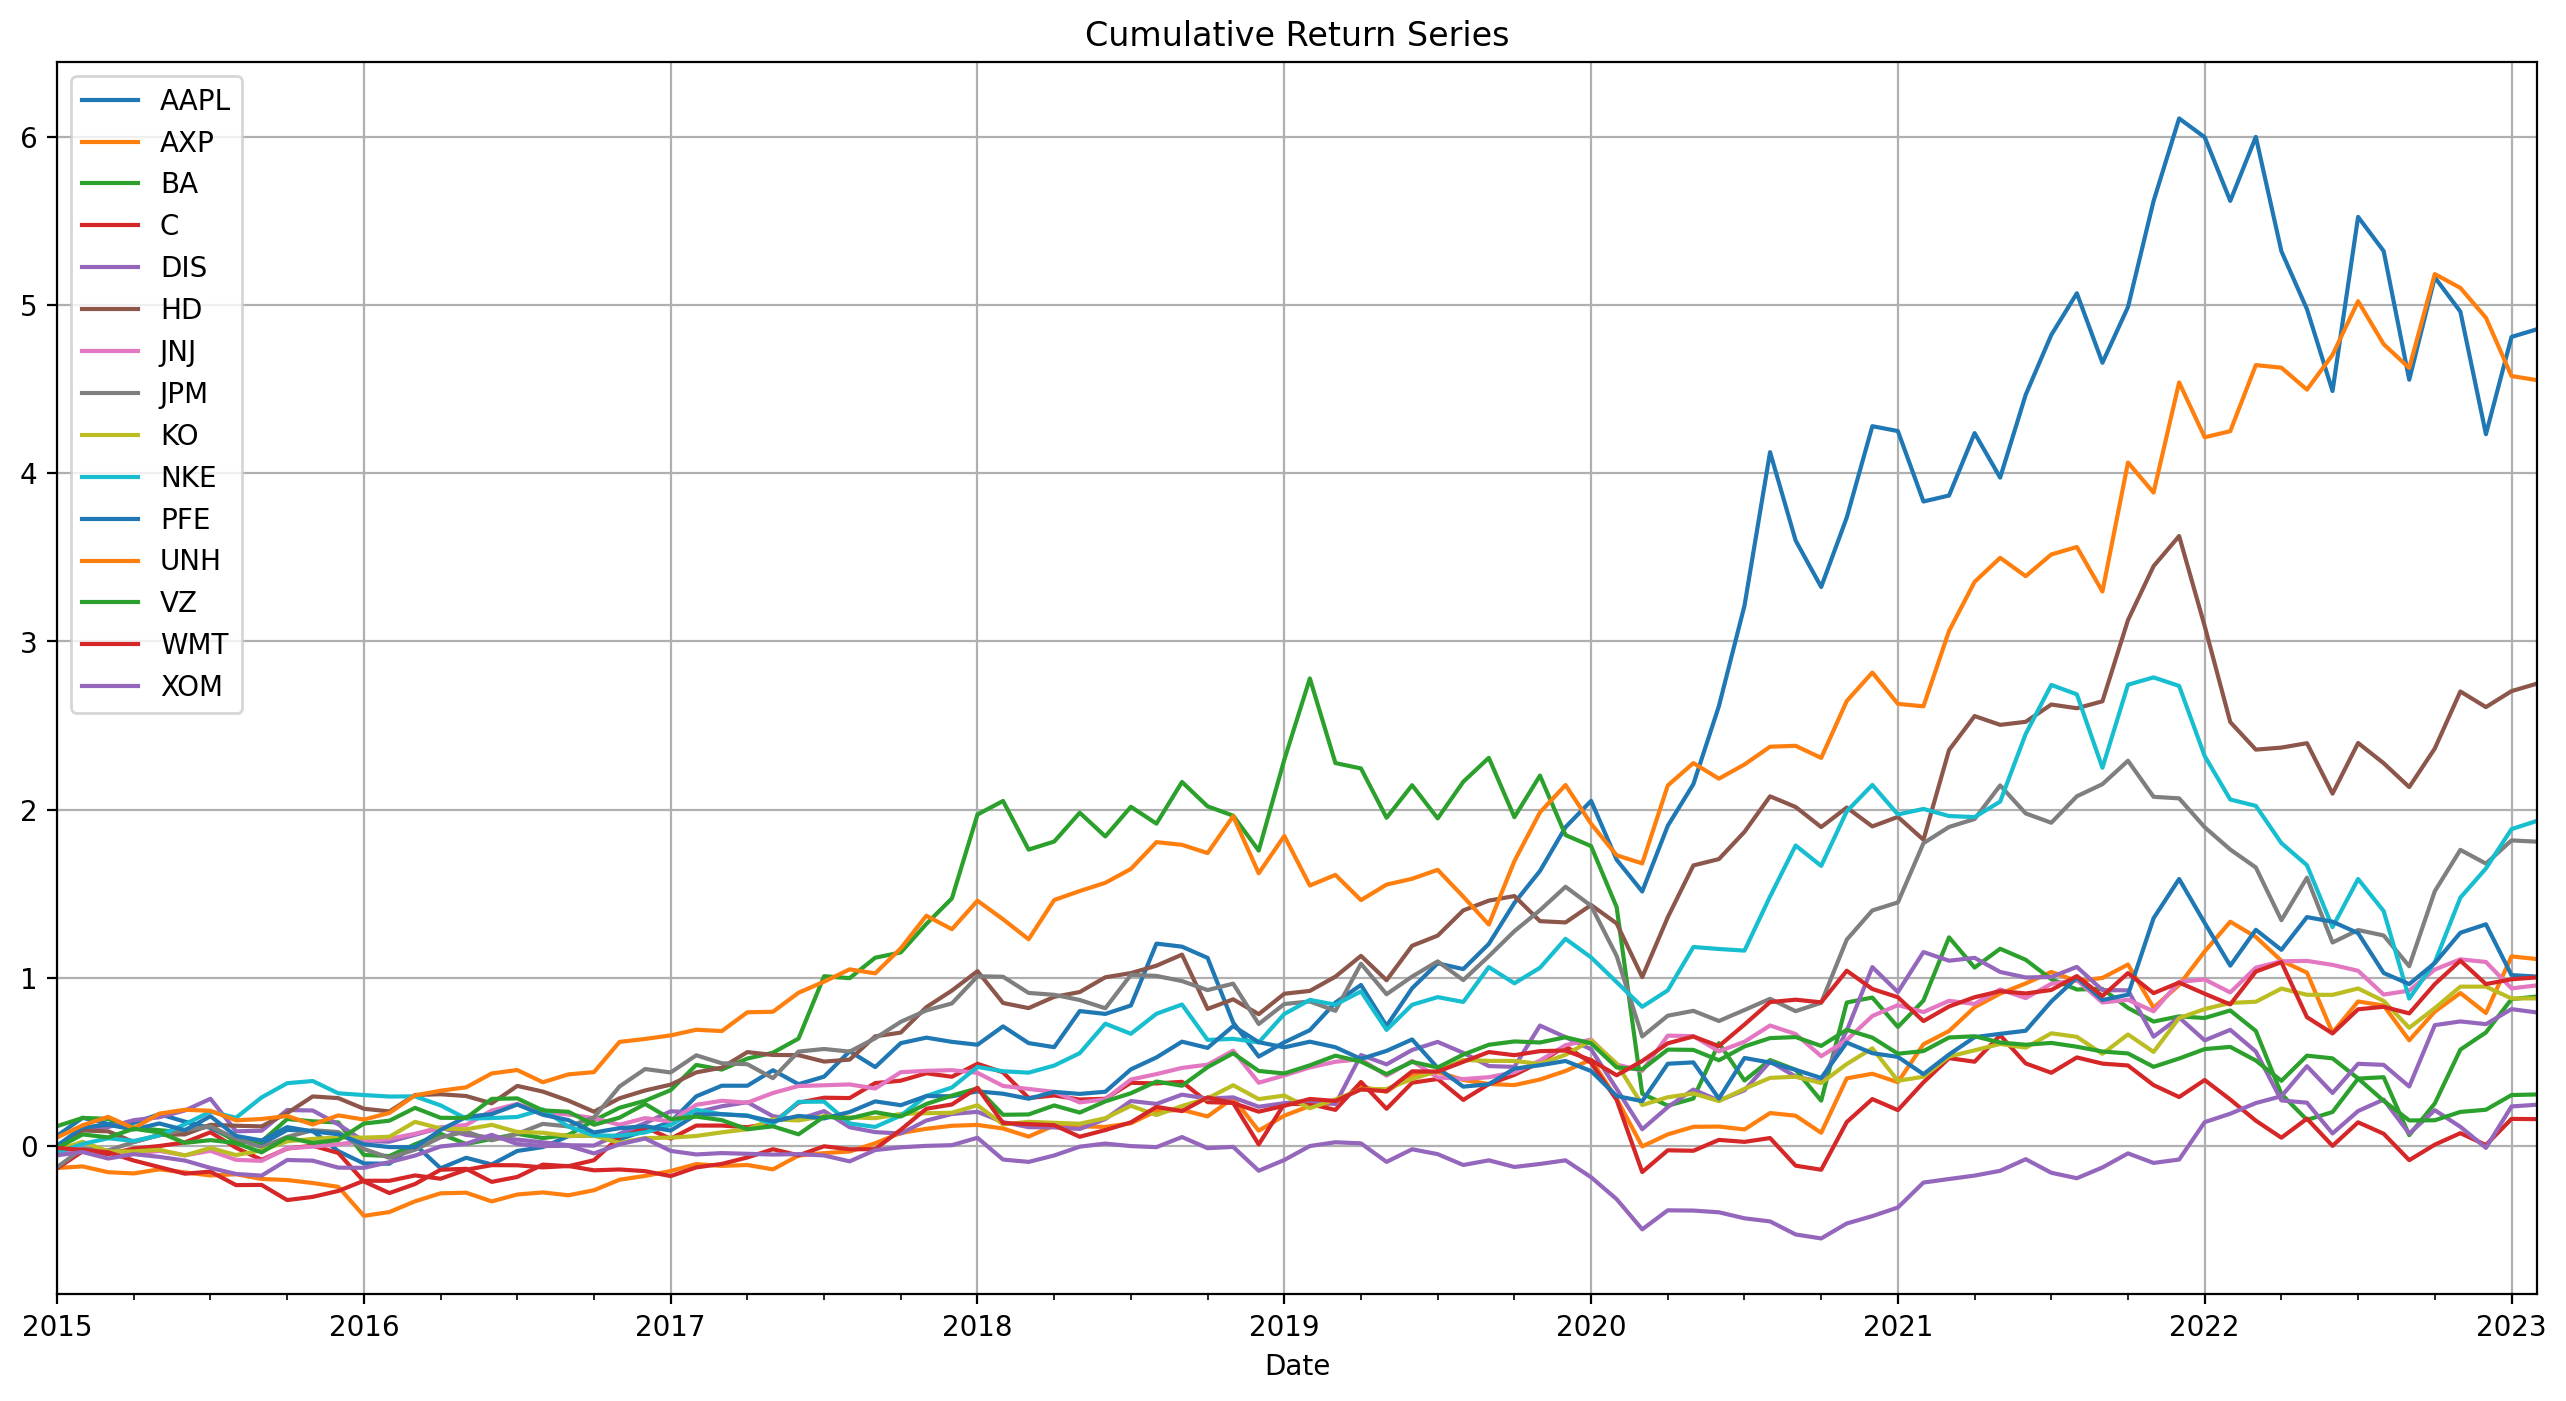

In [27]:
returns_mon.apply(lambda x: (1+x).cumprod()-1).plot.line(figsize = (16,8), grid = True, title = 'Cumulative Return Series');

#### 5. What was the cumulative return for the best performing portfolio? What was the cumulative return for the worst performing portfolio?

In [28]:
Best_Performing = port_returns.apply(lambda x: (1+x).cumprod().iloc[-1]-1).nlargest(1)
Worst_Performing = port_returns.apply(lambda x: (1+x).cumprod().iloc[-1]-1).nsmallest(1)
print(Best_Performing, Worst_Performing)

M_Reb_OP    2.513158
dtype: float64 M_Reb_EW   -1.0
dtype: float64


### PART III - Examination of the Size Effect

Please download the file "crsp_fall22.csv" located in folder Group_Assignment. The file contains the following columns:
* PERMNO - Permanent number (unique identifer for the stock)
* DATE
* PRC - The closing price
* VOL - Trading volume (in hundreds)
* RET - The simple return
* SHROUT - The number of shares outstanding (in thousands)
* CFACPR - Cumulative factor to adjust the closing price
* CFACSHR - Cumulative factor to adjust shares outstanding

#### 1. Create a DataFrame named fin_data by reading in the columns DATE, PERMNO, RET, PRC and SHROUT from the file 'crsp_fall22.csv'. Set the DATE as the index. In addition, change each index value to the end of the month. For example, change '1926-05-30' to 1926-05-31', or '1987-01-30' to '1987-01-31'. In addition, create a new column (labeled MKTCAP) to store the market capitalization (defined as PRC * SHROUT). Subsequently, permanently remove the PRC and SHROUT columns.

In [29]:
# create fin_data, read in the columns, and set date as the index
fin_data = pd.read_csv('crsp_fall22.csv',
                    usecols = ['DATE','PERMNO','RET','PRC','SHROUT'], # todo
                    index_col = 'DATE',
                    dtype = {'PERMNO':np.int64},
                    parse_dates = True)

# the "last day" of 2013 Mar is 28;
# the last day should be 31
fin_data.head()

# change each index value to the end of the month
fin_data.index = fin_data.index + pd.offsets.MonthEnd(0)
print(fin_data.iloc[2].name)

# create mktcap and drop prc & shrout
if set(['PRC','SHROUT']).issubset(fin_data.columns):
    fin_data['MKTCAP']=fin_data['PRC']*fin_data['SHROUT']

# drop prc & shrout
if set(['PRC','SHROUT','MKTCAP']).issubset(fin_data.columns):
    fin_data.drop(['PRC','SHROUT'],axis=1,inplace=True)
fin_data.head()

1990-01-31 00:00:00


,PERMNO,RET,MKTCAP
DATE,,,
1990-01-31,21573,-0.106195,5.499450e+06
1990-01-31,55160,-0.190476,2.067094e+03
1990-01-31,45129,-0.086420,1.892550e+05
1990-01-31,22250,-0.174684,3.117920e+05
1990-01-31,60468,-0.071429,2.227225e+04


#### 2. How many stocks are there in the sample? How many of these stocks are in the sample over the entire sample period?

In [30]:
# Count the number of unique stocks in the sample
num_stocks = fin_data['PERMNO'].nunique()
print(f"There are {num_stocks} stocks in the sample.")

# Count the number of stocks in the sample over the entire sample period
full_period_stocks = fin_data.groupby('PERMNO').size().eq(fin_data.index.nunique()).sum()
print(f"{full_period_stocks} stocks are in the sample over the entire sample period.")


There are 18153 stocks in the sample.
697 stocks are in the sample over the entire sample period.


#### 3. Every June, split the stocks into quintiles (five groups) based on their market capitalization. The header of a DataFrame named size_qt with the resulting split can be found below. 

In [31]:
q_tiers=['1','2','3','4','5']
mktcap_quintiles = fin_data[fin_data.index.month == 6].copy()
mktcap_quintiles['MKTCAP_QT']=mktcap_quintiles.groupby('DATE')['MKTCAP']\
.transform(lambda x : pd.qcut(x,5,labels=q_tiers))
size_qt=mktcap_quintiles[['PERMNO','MKTCAP_QT']]



#### 4. Create a new DataFrame named data by using the merge_asof() function to merge the DataFrames fin_data and size_qt. Specifically, merge each stock's June quintile allocation with the stock's monthly returns for the next 12 months starting the following July. Subsequently, set DATE as the index in the DataFrame.

In [32]:
data=pd.merge_asof(fin_data.drop('MKTCAP',axis=1).sort_index(),\
                   size_qt.sort_index(),by='PERMNO',on='DATE').dropna()
data=data.set_index('DATE')
data


,PERMNO,RET,MKTCAP_QT
DATE,,,
1990-06-30,10294,0.095238,3
1990-06-30,65496,0.063291,3
1990-06-30,10905,0.000000,2
1990-06-30,32037,-0.100000,1
1990-06-30,66288,0.068182,5
...,...,...,...
2022-03-31,16400,-0.070234,1
2022-03-31,16401,0.424749,2
2022-03-31,90664,0.236017,5


#### 5. Create a new DataFrame called quintiles to store the average monthly return for each quintile. The header of the DataFrame can be found below:

In [33]:
# perform operation
quintiles=data.drop('PERMNO',axis=1).groupby(['DATE','MKTCAP_QT']).mean().unstack(1)

# see results
quintiles.columns=quintiles.columns.map(lambda x: "Q"+x[1]+"_RET")
quintiles

,Q1_RET,Q2_RET,Q3_RET,Q4_RET,Q5_RET
DATE,,,,,
1990-06-30,-0.020917,0.015552,0.016568,0.019596,-0.000671
1990-07-31,-0.001078,-0.041629,-0.044858,-0.040050,-0.028895
1990-08-31,-0.088672,-0.111944,-0.134610,-0.132793,-0.110817
1990-09-30,-0.045567,-0.090744,-0.092048,-0.099917,-0.080715
1990-10-31,-0.071408,-0.064675,-0.069424,-0.060729,-0.039041
...,...,...,...,...,...
2021-11-30,-0.070159,-0.056560,-0.057590,-0.039940,-0.038869
2021-12-31,-0.060130,-0.024713,0.006808,0.017798,0.039981
2022-01-31,-0.084816,-0.090499,-0.101309,-0.093579,-0.071738


In [34]:
quintiles.head()

,Q1_RET,Q2_RET,Q3_RET,Q4_RET,Q5_RET
DATE,,,,,
1990-06-30,-0.020917,0.015552,0.016568,0.019596,-0.000671
1990-07-31,-0.001078,-0.041629,-0.044858,-0.040050,-0.028895
1990-08-31,-0.088672,-0.111944,-0.134610,-0.132793,-0.110817
1990-09-30,-0.045567,-0.090744,-0.092048,-0.099917,-0.080715
1990-10-31,-0.071408,-0.064675,-0.069424,-0.060729,-0.039041


#### 6. Create a bar plot of the average monthly return for all five market capitalization groups, across the entire sample.

In [35]:
mktcap_quintiles = fin_data.copy()
mktcap_quintiles['MKTCAP_QT']=mktcap_quintiles.groupby('DATE')['MKTCAP']\
.transform(lambda x : pd.qcut(x,5,labels=q_tiers))
size_qt=mktcap_quintiles[['PERMNO','MKTCAP_QT']]

#### 7. Create a line plot of the cumulative return series for all five market capitalization groups.

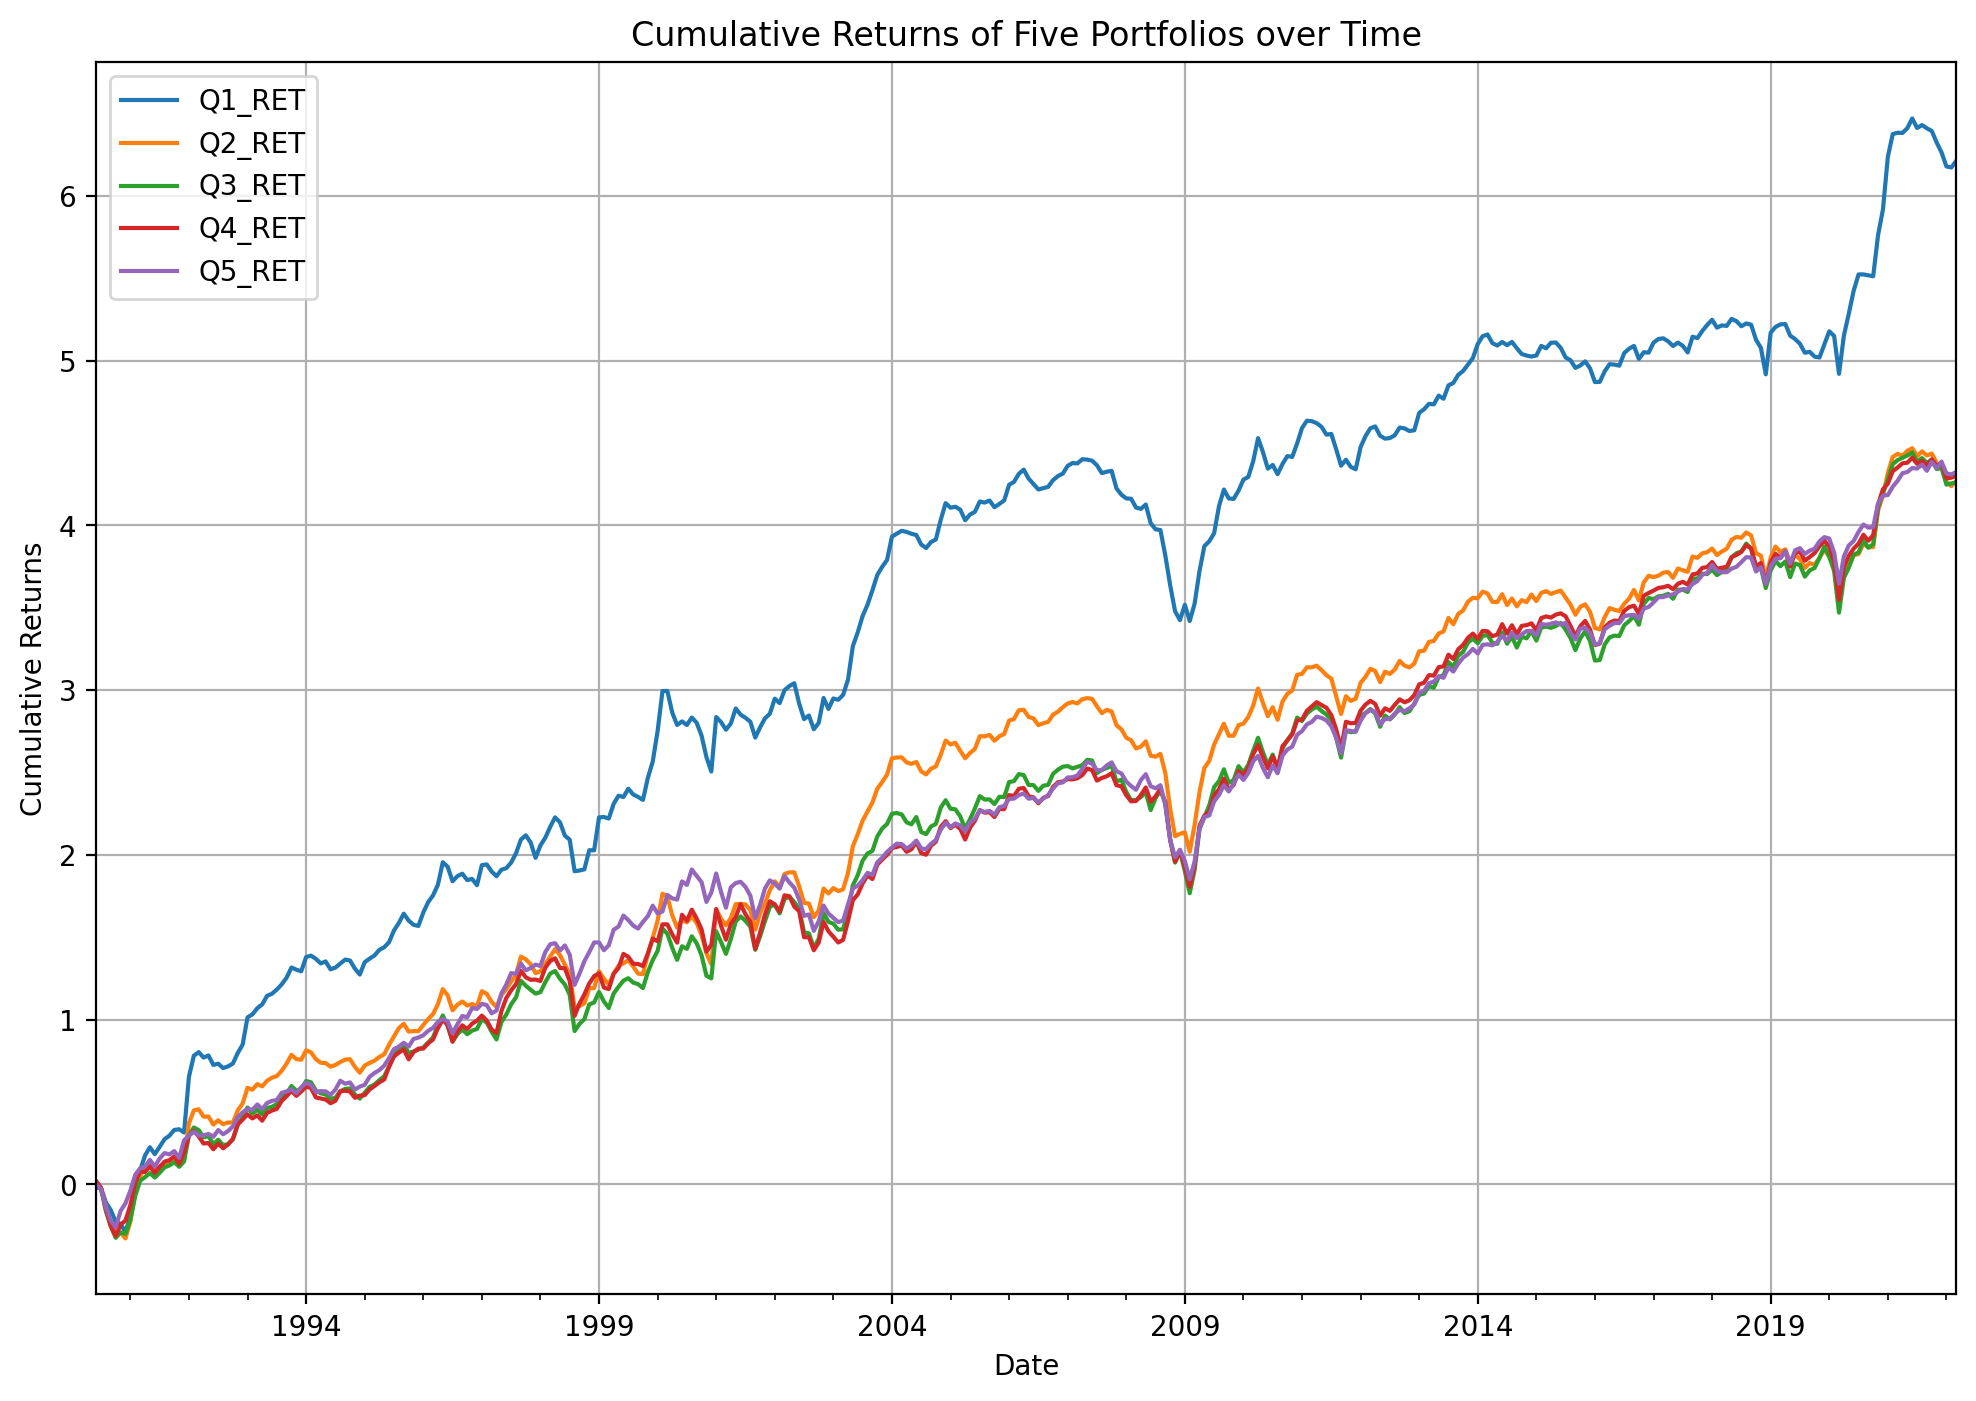

In [23]:
quintiles.cumsum().plot(figsize=(12, 8), grid=True)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Five Portfolios over Time')
plt.show()